In [58]:
import pandas as pd
import numpy as np
%matplotlib inline

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import cross_val_score, GridSearchCV

import matplotlib.pylab as plt
from matplotlib.pylab import rcParams

In [73]:
def read_files(attr_file, data_file):
  ''' return a list of attribute names and the data set matrix'''
  with open(data_file, 'r') as df, open(attr_file, 'r') as rf:
      data = df.readlines()
      attr = rf.readlines()

      examples = [line.split() for line in data]
      col_names = [line.split(':')[0] for line in attr]

      return col_names, examples


attrs, array = read_files('data/attr.txt', 'data/combined.txt')

df = pd.DataFrame(array, columns=attrs)

properties = df[list(df.columns)[:-1]]
labels = df['Class']


In [3]:
print(df.head())

  B1 B2 B3     C1     C2     C3    C4 C5     C6    C7  ... CT22 CT23 CT24  \
0  0  1  0   0.45      0      0     0  0   0.72     0  ...    3    2    2   
1  0  1  0   0.72   1.71   0.81  0.54  0   0.63  0.81  ...    3    2    1   
2  0  0  1   0.45  0.675   0.63     0  0      0     0  ...    3    2    2   
3  0  0  1  0.675  1.845  1.035  0.72  0  1.485  1.35  ...    3    2    1   
4  0  1  0  23.58   1.71      0     0  0   0.63   0.9  ...    3    2    2   

  CT25 CT26 CH1 CH2 CH3 CH4 Class  
0    2    3   0   0   0   0     0  
1    1    3   0   0   0   0     0  
2    1    3   1   0   0   0     1  
3    1    3   0   0   0   0     1  
4    1    3   0   0   0   0     1  

[5 rows x 177 columns]


In [4]:
df.shape

(20000, 177)

In [5]:
#balanced dataset
print(list(labels).count('1'))
print(list(labels).count('0'))

9549
10451


In [6]:
features = attrs[:-1]
print(len(features))
print(features)

176
['B1', 'B2', 'B3', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21', 'C22', 'C23', 'C24', 'C25', 'C26', 'C27', 'C28', 'C29', 'C30', 'C31', 'C32', 'C33', 'C34', 'C35', 'C36', 'C37', 'C38', 'C39', 'C40', 'C41', 'C42', 'C43', 'C44', 'C45', 'C46', 'C47', 'C48', 'C49', 'C50', 'C51', 'C52', 'C53', 'C54', 'C55', 'C56', 'C57', 'C58', 'C59', 'C60', 'C61', 'C62', 'C63', 'C64', 'C65', 'C66', 'C67', 'C68', 'C69', 'C70', 'C71', 'C72', 'C73', 'C74', 'C75', 'C76', 'C77', 'C78', 'C79', 'C80', 'C81', 'C82', 'C83', 'C84', 'C85', 'C86', 'C87', 'C88', 'C89', 'C90', 'C91', 'C92', 'C93', 'C94', 'C95', 'C96', 'C97', 'C98', 'C99', 'C100', 'C101', 'C102', 'C103', 'C104', 'C105', 'C106', 'C107', 'C108', 'C109', 'C110', 'C111', 'C112', 'C113', 'C114', 'C115', 'C116', 'C117', 'C118', 'C119', 'C120', 'C121', 'C122', 'C123', 'C124', 'C125', 'C126', 'C127', 'C128', 'C129', 'C130', 'C131', 'C132', 'C133', 'C134', 'C135', 'C136

In [83]:
def model(clf, train, features):
    clf.fit(train[features], train["Class"])
    probab_of_predict = clf.predict_proba(train[features])[:,1]
    predict_train = clf.predict(train[features])


    #cv_score = cross_val_score(clf,train[features], train["Class"], cv = 5, scoring="roc_auc", n_jobs=-1)
    cv_score = cross_val_score(clf,train[features], train["Class"], cv = 12, n_jobs=-1)

    print("----------------------Model performance-----------------------")
    print("Accuracy score: ", accuracy_score(train["Class"].values, predict_train))
    #print("AUC: ", roc_auc_score(train["Class"],probab_of_predict) )
    print("CV score: Mean: {}, Max: {}, Min: {}, Std: {}".format(np.mean(cv_score), np.max(cv_score),
                                                                     np.min(cv_score), np.std(cv_score)))

    Relative_Feature_importance = pd.Series(clf.feature_importances_, features).sort_values(ascending=False)
    
    Relative_Feature_importance.plot(kind='barh', title='Order of Feature Importance')
    plt.ylabel('Feature Importance')
    plt.show()
    print(Relative_Feature_importance.tail(40))
    print(list(Relative_Feature_importance.tail(40).index))

----------------------Model performance-----------------------
Accuracy score:  0.7455
CV score: Mean: 0.7326499999999999, Max: 0.74225, Min: 0.72475, Std: 0.0061858709976849524


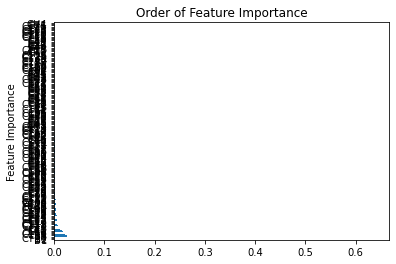

B1      0.634729
B2      0.027859
CT16    0.025943
B3      0.025876
C55     0.021815
          ...   
CT23    0.000000
CT9     0.000000
CT25    0.000000
C71     0.000000
CH4     0.000000
Length: 176, dtype: float64
None


In [8]:
clf = GradientBoostingClassifier(random_state=15)
print(model(clf, df, features))

In [9]:
# tune n_estimators
estimators = [x for x in range(190,300,10)]
first_tune = {'n_estimators': estimators}
first_search = GridSearchCV(estimator=GradientBoostingClassifier(learning_rate=0.05,min_samples_split=70,
                                                                 min_samples_leaf=70,
                                                                 max_depth=8,max_features='sqrt',subsample=0.8, 
                                                                 random_state=15, 
                                                                 )
                   , param_grid=first_tune, n_jobs=10, iid=False, cv=5)

first_search.fit(df[features], df["Class"])

print(first_search.cv_results_ , first_search.best_params_, first_search.best_score_)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_search.py:849: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


{'mean_fit_time': array([11.95100617, 13.33242955, 14.86675739, 17.44688282, 19.16686749,
       19.22000141, 20.01012421, 20.38489628, 22.22799044, 24.23834815,
       21.31238761]), 'std_fit_time': array([0.44225227, 0.05131789, 0.34389374, 0.33829821, 0.23318173,
       0.10015982, 0.10112272, 0.11072792, 0.43676721, 0.15886846,
       0.75715834]), 'mean_score_time': array([0.16104326, 0.15921798, 0.22819037, 0.20200377, 0.20247145,
       0.21933479, 0.20185809, 0.22496624, 0.28228049, 0.2097055 ,
       0.14644451]), 'std_score_time': array([0.01848656, 0.02234441, 0.02624419, 0.01637974, 0.01120309,
       0.03158554, 0.00811722, 0.01781909, 0.06823876, 0.03585097,
       0.00946654]), 'param_n_estimators': masked_array(data=[190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290],
             mask=[False, False, False, False, False, False, False, False,
                   False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'n_estimators': 190}, {

In [10]:
# use n_estimator=190
# tune min split and depth

min_split = [x for x in range(20,1000,50)]
depth = [x for x in range(5,20,1)]
second_tune = {'max_depth':depth, 'min_samples_split':min_split}
second_search = GridSearchCV(estimator=GradientBoostingClassifier(learning_rate=0.05,n_estimators = 190,
                                                                  min_samples_split=450,
                                                                 min_samples_leaf=7,
                                                                  max_depth=8,max_features='sqrt',subsample=0.8, 
                                                                 random_state=15
                                                                 )
                   , param_grid=second_tune, n_jobs=6, iid=False, cv=5)

second_search.fit(df[features], df["Class"])

print(second_search.cv_results_ , second_search.best_params_, second_search.best_score_)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_search.py:849: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


{'mean_fit_time': array([ 8.0287571 ,  7.9487494 ,  7.8582108 ,  7.56892824,  7.62105427,
        7.84680305,  8.36820211,  8.05425072,  8.00166836,  7.97253408,
        7.93209357,  7.97645035,  7.91540632,  7.8090498 ,  7.90803719,
        7.78754067,  7.62855506,  7.83329391,  7.8162724 ,  7.97124629,
        9.65163879,  9.48917384,  9.4298069 ,  9.46403694,  9.28317814,
        9.53218646,  9.7139092 ,  9.53393064,  9.42099314,  9.46063194,
        9.13641324,  8.90119419,  9.71665154,  9.7291616 ,  9.93098435,
        9.56365685,  8.98635712,  8.88348174,  8.68858395,  8.77312202,
       10.97445412, 10.76691871, 10.70180993, 10.47638803, 10.84910378,
       11.1156631 , 11.40348282, 11.21700344, 10.86600032, 10.50267367,
       10.00972991,  9.98669863,  9.95169592,  9.82537537,  9.62630267,
        9.66522207,  9.81602759,  9.73716221,  9.65793614,  9.57766542,
       12.48819394, 12.01529374, 12.02993784, 12.37989292, 12.38694739,
       12.27576823, 12.27637544, 12.06600113, 

In [13]:
#'max_depth': 9, 'min_samples_split': 170} 0.7498
# tune min sample leaf
min_sample_leaf = [x for x in range(7,200,10)]
third_tune = {'min_samples_leaf':min_sample_leaf}
third_search = GridSearchCV(estimator=GradientBoostingClassifier(learning_rate=0.05,n_estimators = 190,
                                                                  min_samples_split=170,
                                                                 min_samples_leaf=50,
                                                                 max_depth=9,max_features='sqrt',subsample=0.8, 
                                                                 random_state=15, 
                                                                 )
                   , param_grid=third_tune, n_jobs=10, iid=False, cv=5)

third_search.fit(df[features], df["Class"])

print(third_search.cv_results_ , third_search.best_params_, third_search.best_score_)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_search.py:849: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


{'mean_fit_time': array([14.06684217, 14.89993372, 14.78376656, 14.41561899, 14.4588553 ,
       14.25107193, 14.53387942, 14.62951603, 14.54912019, 14.34427314,
       14.02461615, 13.70917358, 13.32129016, 13.03562384, 12.81438646,
       12.6485116 , 12.56104779, 12.39478126, 11.9938272 , 10.5197186 ]), 'std_fit_time': array([0.50402576, 0.01323013, 0.2007456 , 0.03433443, 0.10014298,
       0.04527262, 0.07970729, 0.07412057, 0.04530362, 0.04021261,
       0.05855852, 0.03573248, 0.07786398, 0.05881829, 0.03121581,
       0.02518883, 0.03675981, 0.05266966, 0.27310053, 0.45451572]), 'mean_score_time': array([0.19782305, 0.17903109, 0.1843152 , 0.1774024 , 0.17486181,
       0.17598224, 0.18046336, 0.18226347, 0.17291322, 0.18549194,
       0.17551022, 0.17874298, 0.16835685, 0.1743968 , 0.16576352,
       0.17183366, 0.16480708, 0.17214255, 0.12586131, 0.09304843]), 'std_score_time': array([0.02749024, 0.01302858, 0.02295317, 0.00989014, 0.00708181,
       0.00634159, 0.00255368, 0

In [15]:
# {'min_samples_leaf': 7} 0.74985
# tune max feature

max_feat = [x for x in range(10,30,2)]
fourth_tune = {'max_features':max_feat}
fourth_search = GridSearchCV(estimator=GradientBoostingClassifier(learning_rate=0.05,n_estimators = 190,
                                                                  min_samples_split=170,
                                                                 min_samples_leaf=7,
                                                                 max_depth=9,max_features='sqrt',subsample=0.8, 
                                                                 random_state=15, 
                                                                 )
                   , param_grid=fourth_tune, n_jobs=10, iid=False, cv=5)

fourth_search.fit(df[features], df["Class"])

print(fourth_search.cv_results_ , fourth_search.best_params_, fourth_search.best_score_)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_search.py:849: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


{'mean_fit_time': array([10.25975752, 13.31444421, 15.5346025 , 17.10798163, 19.34770265,
       21.64169354, 24.33360848, 26.66936216, 28.08832498, 25.26782799]), 'std_fit_time': array([0.28452932, 0.1580656 , 0.0238432 , 0.05775097, 0.03735576,
       0.10480654, 0.10625672, 0.04712277, 0.36702469, 0.59627944]), 'mean_score_time': array([0.16302276, 0.16480732, 0.1667182 , 0.16957021, 0.17023354,
       0.18997903, 0.18726258, 0.19080229, 0.13546305, 0.09651589]), 'std_score_time': array([0.01582677, 0.00868922, 0.00742932, 0.0128176 , 0.01175811,
       0.0084024 , 0.01616068, 0.01999259, 0.01957   , 0.00356094]), 'param_max_features': masked_array(data=[10, 12, 14, 16, 18, 20, 22, 24, 26, 28],
             mask=[False, False, False, False, False, False, False, False,
                   False, False],
       fill_value='?',
            dtype=object), 'params': [{'max_features': 10}, {'max_features': 12}, {'max_features': 14}, {'max_features': 16}, {'max_features': 18}, {'max_feature

In [19]:
# max feature = 22
# tune sub sample

sub_sample = [0.45, 0.5,0.55,0.6,0.65,0.7,0.75, 0.85, 0.8, 0.9, 0.95]
fifth_tune = {'subsample': sub_sample}
fifth_search = GridSearchCV(estimator=GradientBoostingClassifier(learning_rate=0.05,n_estimators = 190,
                                                                  min_samples_split=170,
                                                                 min_samples_leaf=7,
                                                                 max_depth=9,max_features=22,subsample=0.8, 
                                                                 random_state=15, 
                                                                 )
                   , param_grid=fifth_tune, n_jobs=10, iid=False, cv=5)

fifth_search.fit(df[features], df["Class"])

print(fifth_search.cv_results_ , fifth_search.best_params_, fifth_search.best_score_)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_search.py:849: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


{'mean_fit_time': array([12.48687353, 14.44049153, 16.18563781, 17.50805478, 19.10812039,
       20.62740283, 21.94108834, 24.2743154 , 23.55326982, 25.50077682,
       21.89905243]), 'std_fit_time': array([0.26111731, 0.12193698, 0.04645717, 0.04275345, 0.0471012 ,
       0.0422329 , 0.05345943, 0.07494983, 0.04118504, 0.34056285,
       0.62192465]), 'mean_score_time': array([0.1586802 , 0.15171928, 0.16006913, 0.16083703, 0.16515594,
       0.1649188 , 0.16852546, 0.19379454, 0.17470036, 0.12339697,
       0.08845954]), 'std_score_time': array([0.01593983, 0.00971502, 0.00698232, 0.00481995, 0.00874921,
       0.00535239, 0.00736975, 0.03107261, 0.01417783, 0.01911573,
       0.00290381]), 'param_subsample': masked_array(data=[0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.85, 0.8, 0.9,
                   0.95],
             mask=[False, False, False, False, False, False, False, False,
                   False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'

In [20]:
# sixth tuning: reduce learning rate
learning_rate = [0.05, 0.04, 0.03, 0.02, 0.01, 0.009, 0.005]
sixth_tune = {'learning_rate': learning_rate}
sixth_search = GridSearchCV(estimator=GradientBoostingClassifier(learning_rate=0.05,n_estimators = 190,
                                                                  min_samples_split=170,
                                                                 min_samples_leaf=7,
                                                                 max_depth=9,max_features=22,subsample=0.95, 
                                                                 random_state=15, 
                                                                 )
                   , param_grid=sixth_tune, n_jobs=10, iid=False, cv=5)

sixth_search.fit(df[features], df["Class"])

print(sixth_search.cv_results_ , sixth_search.best_params_, sixth_search.best_score_)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_search.py:849: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


{'mean_fit_time': array([24.11971331, 24.87134738, 26.30605941, 26.72125721, 27.25343041,
       26.88877316, 20.4054462 ]), 'std_fit_time': array([0.30081258, 0.09481647, 0.08185568, 0.08161299, 0.04443485,
       0.24810366, 0.46772048]), 'mean_score_time': array([0.15836501, 0.15721774, 0.16967854, 0.17814803, 0.17838097,
       0.14215937, 0.09847474]), 'std_score_time': array([0.00588664, 0.00386179, 0.00484124, 0.00304537, 0.01106753,
       0.02053341, 0.00629577]), 'param_learning_rate': masked_array(data=[0.05, 0.04, 0.03, 0.02, 0.01, 0.009, 0.005],
             mask=[False, False, False, False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'learning_rate': 0.05}, {'learning_rate': 0.04}, {'learning_rate': 0.03}, {'learning_rate': 0.02}, {'learning_rate': 0.01}, {'learning_rate': 0.009}, {'learning_rate': 0.005}], 'split0_test_score': array([0.7605 , 0.762  , 0.75825, 0.76225, 0.755  , 0.751  , 0.74725]), 'split1_test_score': array([0.7525

In [21]:
# {'learning_rate': 0.02} 0.75465
# back to 1st step: increasing n_estimators
# n_estimators search
estimators = [x for x in range(190,1000,50)]
seventh_tune = {'n_estimators': estimators}
seventht_search = GridSearchCV(estimator=GradientBoostingClassifier(learning_rate=0.02,n_estimators = 190,
                                                                  min_samples_split=170,
                                                                 min_samples_leaf=7,
                                                                 max_depth=9,max_features=22,subsample=0.95, 
                                                                 random_state=15, 
                                                                 )
                   , param_grid=seventh_tune, n_jobs=10, iid=False, cv=5)

seventht_search.fit(df[features], df["Class"])

print(seventht_search.cv_results_ , seventht_search.best_params_, seventht_search.best_score_)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_search.py:849: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


{'mean_fit_time': array([ 24.62209868,  31.83506861,  40.29578924,  46.88425674,
        53.6318716 ,  60.37233696,  66.07939324,  72.56173997,
        78.97633615,  87.18707652,  93.91579866, 101.25775418,
       111.12932272, 116.93565364, 122.67359848, 130.61223378,
       114.36456504]), 'std_fit_time': array([0.29755366, 0.21055905, 0.03912881, 0.08692146, 0.13045051,
       0.06688393, 0.10449046, 0.05560369, 0.12266496, 0.20259429,
       0.46976038, 0.23901423, 0.16270529, 0.20238259, 0.26219287,
       0.1955357 , 0.62899298]), 'mean_score_time': array([0.16546979, 0.19760981, 0.19198556, 0.19706826, 0.20689368,
       0.21680312, 0.23947506, 0.22624669, 0.3062222 , 0.28207707,
       0.267243  , 0.29001741, 0.34162855, 0.29165912, 0.32784085,
       0.25777483, 0.20110564]), 'std_score_time': array([0.00787794, 0.01882759, 0.0117266 , 0.01186068, 0.01704948,
       0.00781892, 0.03422561, 0.00817243, 0.10691403, 0.03174107,
       0.01883193, 0.01283716, 0.04040697, 0.0227779

In [23]:
# back to 1st step...reduce learning rate while increasing n_estimators
learning_rate = [0.02, 0.025, 0.01, 0.015]
estimators = [x for x in range(240,4100,100)]
eighth_tune = {'n_estimators': estimators, 'learning_rate': learning_rate}
eighth_search = GridSearchCV(estimator=GradientBoostingClassifier(learning_rate=0.02,n_estimators = 240,
                                                                  min_samples_split=170,
                                                                 min_samples_leaf=7,
                                                                 max_depth=9,max_features=22,subsample=0.95, 
                                                                 random_state=15
                                                                 )
                   , param_grid=eighth_tune, n_jobs=12, iid=False, cv=5)

eighth_search.fit(df[features], df["Class"])

print(eighth_search.cv_results_ , eighth_search.best_params_, eighth_search.best_score_)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_search.py:849: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


{'mean_fit_time': array([ 32.83890514,  48.43612041,  64.49592266,  80.13922386,
        94.43435245, 108.51102123, 122.67247996, 136.60535011,
       150.03043122, 163.06070642, 176.78718848, 192.57704225,
       209.17264228, 224.3018209 , 238.82973008, 253.90647845,
       268.5029851 , 287.98594623, 304.9205337 , 316.44541411,
       326.40829325, 339.86852875, 353.62160845, 368.01525731,
       383.21146202, 398.10723109, 413.55484538, 429.34702902,
       445.35593472, 462.35221858, 477.91709146, 491.60085707,
       502.51841736, 516.29414482, 534.70062923, 550.94893441,
       560.24188666, 572.32708902, 586.20394931,  36.23409276,
        51.10195179,  65.5763072 ,  79.92213283,  94.24314961,
       108.62316341, 123.2441277 , 137.99764132, 152.14466205,
       166.12263656, 180.08025918, 194.76336799, 209.2461916 ,
       224.98064213, 240.2145103 , 256.91404381, 273.82754273,
       287.66688623, 298.35551705, 312.24540672, 326.04091601,
       340.55418911, 354.63977652, 36

----------------------Model performance-----------------------
Accuracy score:  0.80615
CV score: Mean: 0.754998400079888, Max: 0.7744451109778044, Min: 0.7382953181272509, Std: 0.009219628311528939


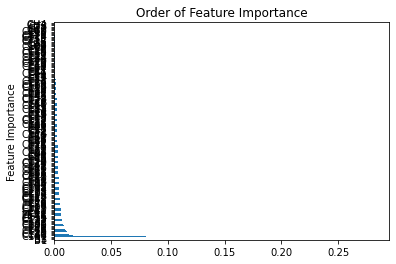

C84     0.000892
C71     0.000859
C7      0.000797
C94     0.000780
C80     0.000769
CT19    0.000736
C19     0.000679
CT20    0.000646
CT9     0.000616
C129    0.000614
C49     0.000613
C34     0.000588
C124    0.000576
C5      0.000566
C39     0.000555
CT10    0.000544
C65     0.000530
C125    0.000488
C20     0.000476
CT6     0.000476
C9      0.000464
C109    0.000451
C24     0.000431
CH1     0.000403
C35     0.000402
CT26    0.000401
CT14    0.000376
CT5     0.000357
CT15    0.000348
C114    0.000340
CT25    0.000300
C50     0.000273
C95     0.000256
C110    0.000249
C69     0.000163
CH2     0.000000
CT7     0.000000
CT8     0.000000
CH3     0.000000
CH4     0.000000
dtype: float64
['C84', 'C71', 'C7', 'C94', 'C80', 'CT19', 'C19', 'CT20', 'CT9', 'C129', 'C49', 'C34', 'C124', 'C5', 'C39', 'CT10', 'C65', 'C125', 'C20', 'CT6', 'C9', 'C109', 'C24', 'CH1', 'C35', 'CT26', 'CT14', 'CT5', 'CT15', 'C114', 'CT25', 'C50', 'C95', 'C110', 'C69', 'CH2', 'CT7', 'CT8', 'CH3', 'CH4']
None


In [84]:
# evalutation
clf = GradientBoostingClassifier(learning_rate=0.015,n_estimators = 240,
                                                                  min_samples_split=170,
                                                                 min_samples_leaf=7,
                                                                 max_depth=9,max_features=22,subsample=0.95, 
                                                                 random_state=15)
print(model(clf, df, features))

In [85]:
#drop features
dropped = ['C84', 'C71', 'C7', 'C94', 'C80', 'CT19', 'C19', 'CT20', 'CT9', 'C129', 'C49', 'C34', 'C124', 'C5', 'C39', 'CT10', 'C65', 'C125', 'C20', 'CT6', 'C9', 'C109', 'C24', 'CH1', 'C35', 'CT26', 'CT14', 'CT5', 'CT15', 'C114', 'CT25', 'C50', 'C95', 'C110', 'C69', 'CH2', 'CT7', 'CT8', 'CH3', 'CH4']
new_features = [i for i in features if i not in dropped]
new_df = df.drop(dropped, axis=1)

print(new_df.head())
print(len(new_features))

  B1 B2 B3     C1     C2     C3    C4     C6    C8   C10  ... CT12 CT13 CT16  \
0  0  1  0   0.45      0      0     0   0.72  0.81     0  ...    4    7    2   
1  0  1  0   0.72   1.71   0.81  0.54   0.63  0.54  0.54  ...    3    7    2   
2  0  0  1   0.45  0.675   0.63     0      0     0  0.72  ...    3    6    2   
3  0  0  1  0.675  1.845  1.035  0.72  1.485     0  0.54  ...    3    6    2   
4  0  1  0  23.58   1.71      0     0   0.63  0.45  0.72  ...    3    5    2   

  CT17 CT18 CT21 CT22 CT23 CT24 Class  
0    3    4    5    3    2    2     0  
1    4    6    4    3    2    1     0  
2    3    5    5    3    2    2     1  
3    3    5    4    3    2    1     1  
4    3    5    4    3    2    2     1  

[5 rows x 137 columns]
136


----------------------Model performance-----------------------
Accuracy score:  0.81075
CV score: Mean: 0.7559978700538403, Max: 0.7708458308338332, Min: 0.7382953181272509, Std: 0.009420247417246955


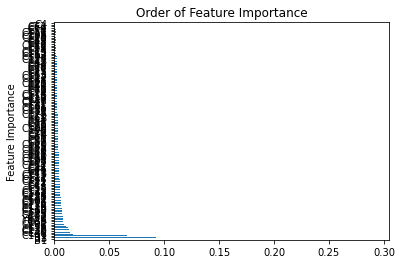

C45     0.002646
C60     0.002617
C121    0.002609
C93     0.002602
C68     0.002562
C127    0.002557
C12     0.002531
C113    0.002479
C63     0.002471
C37     0.002460
C75     0.002350
C57     0.002321
C18     0.002321
C38     0.002317
C83     0.002304
C42     0.002186
C3      0.002158
C117    0.002150
C33     0.002123
C102    0.002063
C52     0.002058
C112    0.002040
C123    0.002032
C14     0.001953
C27     0.001945
C82     0.001870
CT18    0.001862
C22     0.001816
C48     0.001779
C89     0.001779
C10     0.001704
CT23    0.001548
C106    0.001495
C99     0.001388
CT11    0.001342
C54     0.001320
C79     0.001265
C64     0.001172
CT2     0.001105
C4      0.000890
dtype: float64
['C45', 'C60', 'C121', 'C93', 'C68', 'C127', 'C12', 'C113', 'C63', 'C37', 'C75', 'C57', 'C18', 'C38', 'C83', 'C42', 'C3', 'C117', 'C33', 'C102', 'C52', 'C112', 'C123', 'C14', 'C27', 'C82', 'CT18', 'C22', 'C48', 'C89', 'C10', 'CT23', 'C106', 'C99', 'CT11', 'C54', 'C79', 'C64', 'CT2', 'C4']
None


In [86]:
# reevaluate
clf = GradientBoostingClassifier(learning_rate=0.015,n_estimators = 240,
                                                                  min_samples_split=170,
                                                                 min_samples_leaf=7,
                                                                 max_depth=9,max_features=22,subsample=0.95, 
                                                                 random_state=15)
print(model(clf, new_df, new_features))

In [90]:
# back to second step
# tune min split and depth
min_split = [x for x in range(20,500,30)]
depth = [x for x in range(5,22,1)]
ninth_tune = {'max_depth':depth, 'min_samples_split':min_split}
ninth_search = GridSearchCV(estimator=GradientBoostingClassifier(learning_rate=0.015,n_estimators = 240,
                                                                  min_samples_split=170,
                                                                 min_samples_leaf=7,
                                                                 max_depth=9,max_features=22,subsample=0.95, 
                                                                 random_state=15)
                                ,param_grid=ninth_tune, n_jobs=12, iid=False, cv=5)

ninth_search.fit(new_df[new_features], new_df["Class"])

print(ninth_search.cv_results_ , ninth_search.best_params_, ninth_search.best_score_)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_search.py:849: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


{'mean_fit_time': array([ 23.0076088 ,  25.24580359,  27.19193296,  27.36535559,
        26.77163224,  25.777846  ,  25.86313128,  26.84708824,
        27.03449869,  26.79790034,  26.37796936,  26.21845899,
        25.90914969,  25.96315036,  26.40018635,  26.50734816,
        32.56452518,  33.17020364,  33.24219112,  32.16176281,
        31.44856625,  31.16499443,  31.3929307 ,  31.44144521,
        31.02921581,  30.87940521,  31.01991501,  31.02130222,
        30.80193624,  30.36132116,  30.47761765,  30.77344174,
        37.48567348,  36.83743124,  36.95768485,  36.81624455,
        36.19814191,  36.38762856,  36.21134849,  35.70935006,
        35.61010056,  35.81381497,  35.51087599,  35.2883265 ,
        35.30084453,  35.08506622,  34.88590441,  34.9950696 ,
        43.26925039,  42.33490882,  42.01287379,  41.68522148,
        41.15933871,  41.04465413,  40.73446493,  40.29912901,
        40.23020668,  39.93598809,  39.54846921,  39.45210962,
        39.14803557,  38.66409078,  3

In [95]:
#{'max_depth': 18, 'min_samples_split': 170} 0.7593500000000001
# back to third step
# tune min sample leaf
min_sample_leaf = [x for x in range(7,100,5)]
tenth_tune = {'min_samples_leaf':min_sample_leaf}
tenth_search = GridSearchCV(estimator=GradientBoostingClassifier(learning_rate=0.015,n_estimators = 240,
                                                                  min_samples_split=170,
                                                                 min_samples_leaf=7,
                                                                 max_depth=18,max_features=22,subsample=0.95, 
                                                                 random_state=15)
                   , param_grid=tenth_tune, n_jobs=10, iid=False, cv=5)

tenth_search.fit(new_df[new_features], new_df["Class"])

print(tenth_search.cv_results_ , tenth_search.best_params_, tenth_search.best_score_)



/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_search.py:849: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


{'mean_fit_time': array([59.33006477, 57.90392394, 58.27993102, 57.10899715, 58.28622265,
       57.58073101, 55.89830594, 55.00088682, 54.12767067, 53.45423913,
       53.57332859, 52.60450644, 51.27701259, 50.78461361, 50.30771484,
       50.36514635, 49.82041173, 48.76731782, 34.01995854]), 'std_fit_time': array([0.23869525, 0.26132897, 0.19571867, 0.12469667, 0.28289733,
       0.19311105, 0.45205654, 0.301993  , 0.20818747, 0.2996983 ,
       0.31875696, 0.40590756, 0.49221206, 0.18384545, 0.25844032,
       0.2332217 , 0.43889643, 0.56952431, 0.55932881]), 'mean_score_time': array([0.18868842, 0.18080921, 0.1883522 , 0.1792603 , 0.2025135 ,
       0.19136605, 0.19122066, 0.19512796, 0.18907051, 0.22514691,
       0.19032717, 0.18195295, 0.17838626, 0.17493944, 0.18561721,
       0.20820212, 0.1781848 , 0.14911718, 0.11034446]), 'std_score_time': array([0.01316266, 0.00783862, 0.00961826, 0.00778122, 0.01187049,
       0.01325276, 0.01268946, 0.02634903, 0.00608177, 0.0517183 ,
  

In [96]:
# back to forth step
# tune max feature
'''
max_feat = [x for x in range(19,60,3)]
eleventh_tune = {'max_features':max_feat}
elevent_search = GridSearchCV(estimator=GradientBoostingClassifier(learning_rate=0.015,n_estimators = 240,
                                                                  min_samples_split=170,
                                                                 min_samples_leaf=7,
                                                                 max_depth=18,max_features=22,subsample=0.95, 
                                                                 random_state=15)
                   , param_grid=eleventh_tune, n_jobs=10, iid=False, cv=5)

elevent_search.fit(df[features], df["Class"])

print(elevent_search.cv_results_ , elevent_search.best_params_, elevent_search.best_score_)
'''


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_search.py:849: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


{'mean_fit_time': array([ 42.82684503,  50.02580237,  58.79297504,  65.33180795,
        71.10440259,  77.90958581,  86.17097983,  93.03281045,
       103.82301354, 109.35515146, 108.29312477, 113.57866707,
       119.48363299, 111.22301612]), 'std_fit_time': array([0.3380612 , 0.21244349, 0.34290384, 0.41295158, 0.09475813,
       0.30118614, 0.47821883, 0.56993051, 0.22763327, 0.26856563,
       0.41623457, 0.31216137, 0.39956902, 0.80878107]), 'mean_score_time': array([0.2241221 , 0.2226017 , 0.21476717, 0.21243558, 0.24625688,
       0.23197284, 0.21040225, 0.21034055, 0.24376793, 0.2145762 ,
       0.20192895, 0.21714973, 0.17262521, 0.12022386]), 'std_score_time': array([0.01273123, 0.00480819, 0.02138926, 0.01606086, 0.05129677,
       0.01961195, 0.01386426, 0.01429702, 0.04999235, 0.01161286,
       0.01782055, 0.02573013, 0.02574209, 0.00778503]), 'param_max_features': masked_array(data=[19, 22, 25, 28, 31, 34, 37, 40, 43, 46, 49, 52, 55, 58],
             mask=[False, False,

In [97]:
# back to fifth step
# tune sub sample
'''
sub_sample = [0.45, 0.5,0.55,0.6,0.65,0.7,0.75, 0.85, 0.8, 0.9, 0.95]
twelvth_tune = {'subsample': sub_sample}
twelvth_search = GridSearchCV(estimator=GradientBoostingClassifier(learning_rate=0.015,n_estimators = 240,
                                                                  min_samples_split=170,
                                                                 min_samples_leaf=7,
                                                                 max_depth=18,max_features=22,subsample=0.95, 
                                                                 random_state=15)
                   , param_grid=eleventh_tune, n_jobs=10, iid=False, cv=5)

twelvth_search.fit(df[features], df["Class"])

print(twelvth_search.cv_results_ , twelvth_search.best_params_, twelvth_search.best_score_)
'''


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_search.py:849: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


{'mean_fit_time': array([ 42.25192151,  49.43899217,  56.77415037,  63.22262659,
        69.41882906,  75.6707365 ,  82.30836997,  88.68765159,
        95.07572436, 101.86886621, 108.1060812 , 114.65384965,
       120.49900298, 111.74459972]), 'std_fit_time': array([0.37815133, 0.11579143, 0.20787371, 0.34017481, 0.15844975,
       0.53024659, 0.44887852, 0.51675344, 0.25152147, 0.30600269,
       0.4844363 , 0.53654525, 0.48397828, 0.89450227]), 'mean_score_time': array([0.22530527, 0.20834465, 0.21793022, 0.21497302, 0.21598034,
       0.20471897, 0.21528354, 0.21130676, 0.21102967, 0.19752498,
       0.20890036, 0.20470653, 0.17254028, 0.121696  ]), 'std_score_time': array([0.01072703, 0.02503714, 0.01672152, 0.01700524, 0.01762303,
       0.02130814, 0.02011023, 0.01446489, 0.01859729, 0.0162228 ,
       0.0115026 , 0.00759912, 0.0265882 , 0.01199943]), 'param_max_features': masked_array(data=[19, 22, 25, 28, 31, 34, 37, 40, 43, 46, 49, 52, 55, 58],
             mask=[False, False,

In [99]:
# final tune: n_estimator
'''
estimators = [x for x in range(240,400,20)]
thirteenth_tune = {'n_estimators': estimators}
thirteenth_search = GridSearchCV(estimator=GradientBoostingClassifier(learning_rate=0.015,n_estimators = 240,
                                                                  min_samples_split=170,
                                                                 min_samples_leaf=7,
                                                                 max_depth=18,max_features=22,subsample=0.95, 
                                                                 random_state=15
                                                                 )
                   , param_grid=thirteenth_tune, n_jobs=12, iid=False, cv=5)

thirteenth_search.fit(df[features], df["Class"])

print(thirteenth_search.cv_results_ , thirteenth_search.best_params_, thirteenth_search.best_score_)
'''

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_search.py:849: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


{'mean_fit_time': array([53.89344921, 60.0279067 , 66.51637859, 73.11859579, 78.37847342,
       82.05736237, 84.05254011, 67.83115325]), 'std_fit_time': array([0.20486647, 0.14763199, 0.72063007, 0.2161105 , 0.66885566,
       0.66738916, 1.45793853, 8.78704199]), 'mean_score_time': array([0.23701916, 0.26428542, 0.26029477, 0.30421705, 0.26801534,
       0.25660715, 0.21158996, 0.14682755]), 'std_score_time': array([0.01169826, 0.01824897, 0.01151877, 0.05728079, 0.01833337,
       0.0128022 , 0.02552943, 0.00768434]), 'param_n_estimators': masked_array(data=[240, 260, 280, 300, 320, 340, 360, 380],
             mask=[False, False, False, False, False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'n_estimators': 240}, {'n_estimators': 260}, {'n_estimators': 280}, {'n_estimators': 300}, {'n_estimators': 320}, {'n_estimators': 340}, {'n_estimators': 360}, {'n_estimators': 380}], 'split0_test_score': array([0.7605 , 0.7605 , 0.7615 , 0.7615 , 0.76 

In [111]:
# last attempt tune ccp_alpha
# bad...
'''
ccp_alpha = [0.005, 0.01, 0.015, 0.02]
thirteenth_one_tune = {'ccp_alpha': ccp_alpha}
thirteenth_one_search = GridSearchCV(estimator=GradientBoostingClassifier(learning_rate=0.015,n_estimators = 240,
                                                                  min_samples_split=170,
                                                                 min_samples_leaf=7,
                                                                 max_depth=18,max_features=22,subsample=0.95, 
                                                                 random_state=15,
                                                                 ccp_alpha=0
                                                                 )
                   , param_grid=thirteenth_one_tune, n_jobs=12, iid=False, cv=5)

thirteenth_one_search.fit(new_df[new_features], new_df["Class"])

print(thirteenth_one_search.cv_results_ , thirteenth_one_search.best_params_, thirteenth_one_search.best_score_)
'''

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_search.py:849: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


{'mean_fit_time': array([58.25730801, 59.53956122, 52.44546156, 46.10879693]), 'std_fit_time': array([0.51834288, 0.46922565, 5.41464086, 0.87505139]), 'mean_score_time': array([0.12555175, 0.12889199, 0.08208866, 0.05743432]), 'std_score_time': array([0.00455298, 0.01156541, 0.02078956, 0.00080109]), 'param_ccp_alpha': masked_array(data=[0.005, 0.01, 0.015, 0.02],
             mask=[False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'ccp_alpha': 0.005}, {'ccp_alpha': 0.01}, {'ccp_alpha': 0.015}, {'ccp_alpha': 0.02}], 'split0_test_score': array([0.712 , 0.7085, 0.7085, 0.7085]), 'split1_test_score': array([0.70825, 0.70825, 0.70825, 0.70825]), 'split2_test_score': array([0.71075, 0.7085 , 0.7085 , 0.7085 ]), 'split3_test_score': array([0.6965 , 0.69325, 0.69325, 0.69325]), 'split4_test_score': array([0.7025 , 0.70025, 0.70025, 0.70025]), 'mean_test_score': array([0.706  , 0.70375, 0.70375, 0.70375]), 'std_test_score': array([0.00576411, 0.0061298

----------------------Model performance-----------------------
Accuracy score:  0.8699
CV score: Mean: 0.7597478403478969, Max: 0.7846430713857229, Min: 0.7430972388955582, Std: 0.011117111166532394


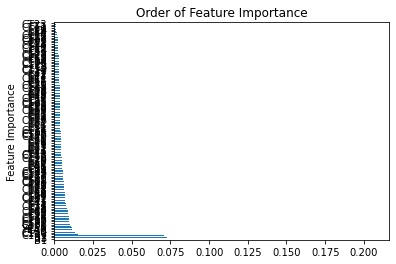

C75     0.003437
CT21    0.003353
C53     0.003346
C16     0.003325
C57     0.003312
C111    0.003253
C27     0.003244
C22     0.003185
C42     0.003176
C37     0.003144
CT17    0.003027
C128    0.003024
C3      0.002977
C8      0.002936
C117    0.002932
C108    0.002901
C14     0.002895
C52     0.002882
C68     0.002881
C113    0.002827
C123    0.002750
C89     0.002701
C33     0.002697
CT4     0.002676
C127    0.002554
C10     0.002473
CT24    0.002434
CT1     0.002408
C82     0.002289
C106    0.002233
CT18    0.002188
C79     0.001958
C112    0.001944
C64     0.001848
C54     0.001463
C4      0.001432
C99     0.001420
CT11    0.001072
CT2     0.001031
CT23    0.000665
dtype: float64
['C75', 'CT21', 'C53', 'C16', 'C57', 'C111', 'C27', 'C22', 'C42', 'C37', 'CT17', 'C128', 'C3', 'C8', 'C117', 'C108', 'C14', 'C52', 'C68', 'C113', 'C123', 'C89', 'C33', 'CT4', 'C127', 'C10', 'CT24', 'CT1', 'C82', 'C106', 'CT18', 'C79', 'C112', 'C64', 'C54', 'C4', 'C99', 'CT11', 'CT2', 'CT23']
None


In [123]:
# final evalutation
clf = GradientBoostingClassifier(learning_rate=0.015,n_estimators = 240,
                                 min_samples_split=170,
                                 min_samples_leaf=7,
                                 max_depth=18,max_features=22,subsample=0.95, 
                                 random_state=15)
print(model(clf, new_df, new_features))